In [27]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as F
import mlflow
%matplotlib inline

In [3]:
df = pd.read_csv('/pima-diabetes/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Change to categorical variable for visualization
df['Outcome'] = np.where(df['Outcome'] == 1, "Diabetic","Non-Diabetic")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


/home/jothammasila/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


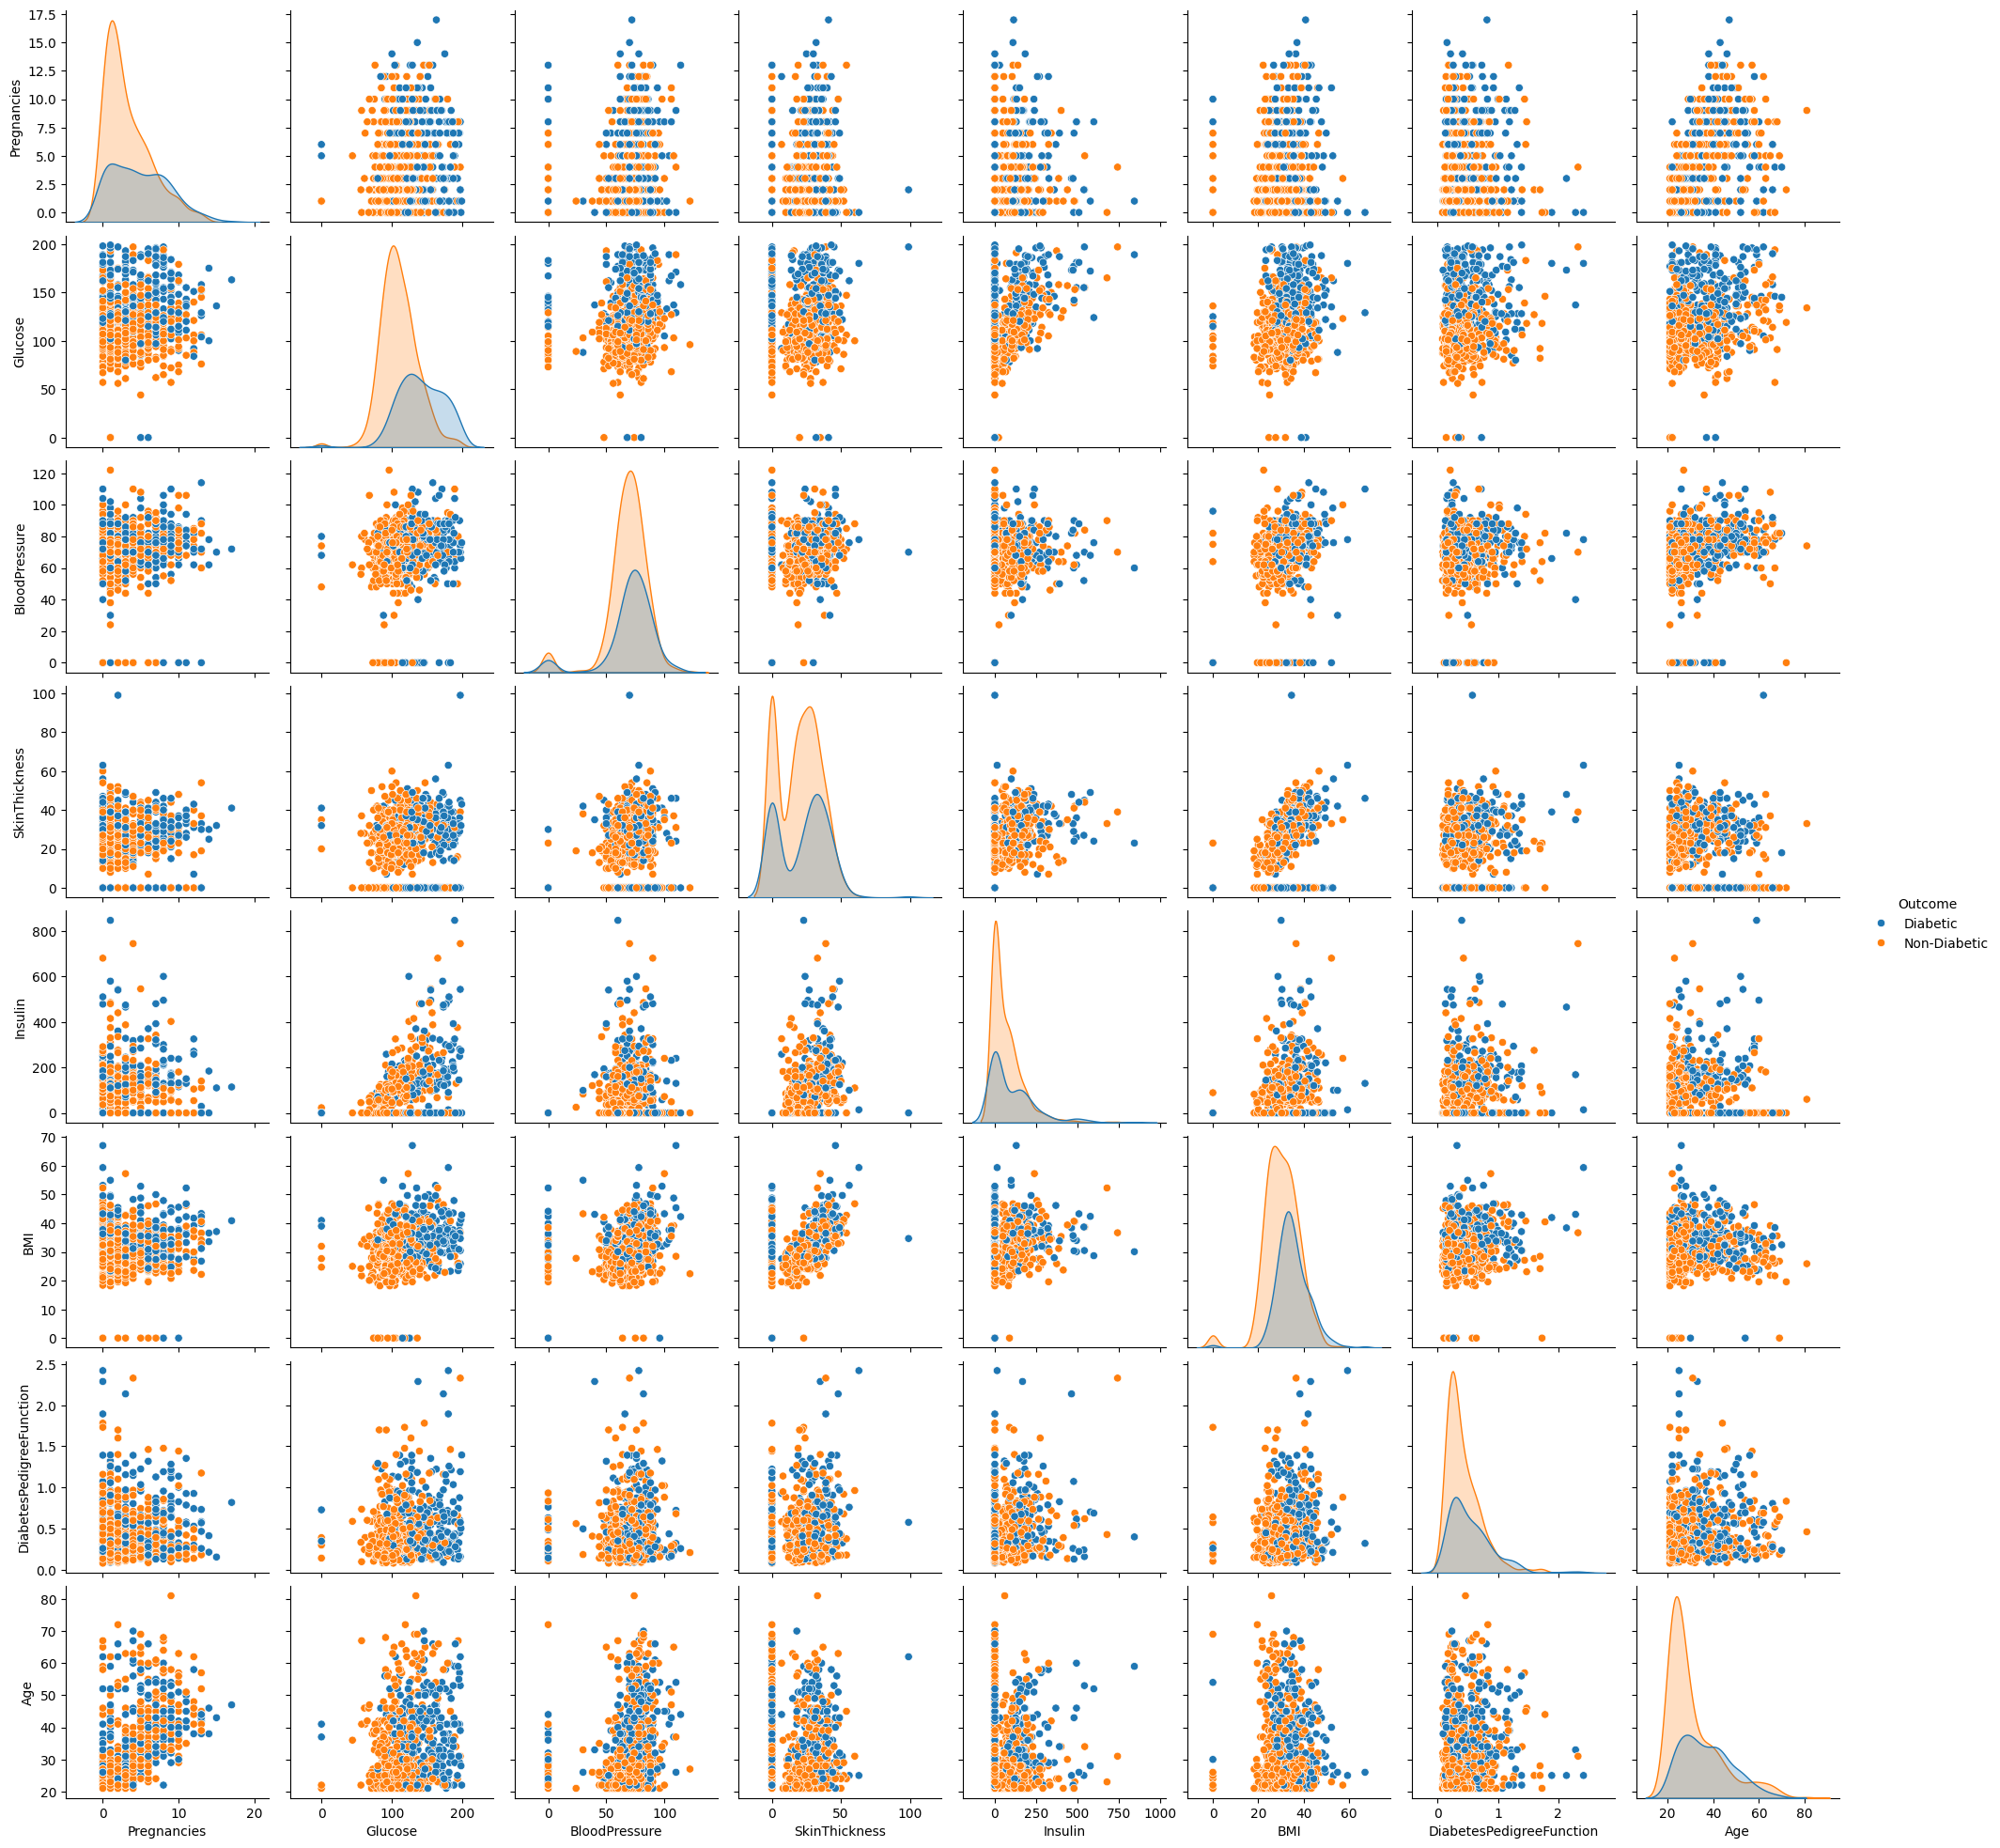

In [7]:
# Seaborn takes category features. That is inform of strings
sns.pairplot(df,hue="Outcome");

In [9]:
df = pd.read_csv('/pima-diabetes/diabetes.csv')

In [10]:
X = df.drop('Outcome',axis=1).values ## Independent variables
y = df['Outcome'].values ## Dependent variable

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
## Creating Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
## Creating Model with PyTorch

class Diabetic_Model(nn.Module):
    def __init__(self,input_layer=8, h_layer1=20, h_layer2=20,output_layer=2):
        super().__init__()
        self.dense_layer1 = nn.Linear(input_layer,h_layer1)
        self.dense_layer2 = nn.Linear(h_layer1,h_layer2)
        self.output_layer = nn.Linear(h_layer2,output_layer)
        
    def forward(self,x):
        x = F.relu(self.dense_layer1(x))
        x = F.relu(self.dense_layer2(x))
        x = self.output_layer(x)
        
        return x



        

In [14]:
## Instantiate model
torch.manual_seed(0) # For application of the initial weights

model = Diabetic_Model()

In [34]:
model.parameters

<bound method Module.parameters of Diabetic_Model(
  (dense_layer1): Linear(in_features=8, out_features=20, bias=True)
  (dense_layer2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=2, bias=True)
)>

In [36]:
params ={
    "lr":0.001,
    "epochs": 1000
}

In [35]:
# Backward propagation 
## a) Define loss function
## b) Define the Optimizer
lr = 0.001
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

CrossEntropyLoss()


In [19]:
epochs = 1000 # Epochs

final_loses = []

for epc in range(epochs):
    epc + 1
    y_pred = model.forward(X_train)
    loss = loss_func(y_pred, y_train)
    final_loses.append(loss)

    if epc % 100 ==1:
        print(f"Epoch nunber: {epc} =========> Loss for epoch number {epc}: {loss.item()}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch nunber: 1 =========> Loss for epoch number 1: 0.36750057339668274
Epoch nunber: 101 =========> Loss for epoch number 101: 0.3564877212047577
Epoch nunber: 201 =========> Loss for epoch number 201: 0.3446885049343109
Epoch nunber: 301 =========> Loss for epoch number 301: 0.33650287985801697
Epoch nunber: 401 =========> Loss for epoch number 401: 0.3320101499557495
Epoch nunber: 501 =========> Loss for epoch number 501: 0.32529112696647644
Epoch nunber: 601 =========> Loss for epoch number 601: 0.3210875689983368
Epoch nunber: 701 =========> Loss for epoch number 701: 0.31707078218460083
Epoch nunber: 801 =========> Loss for epoch number 801: 0.3144475221633911
Epoch nunber: 901 =========> Loss for epoch number 901: 0.31107184290885925


Text(0.5, 1.0, 'Loss Function')

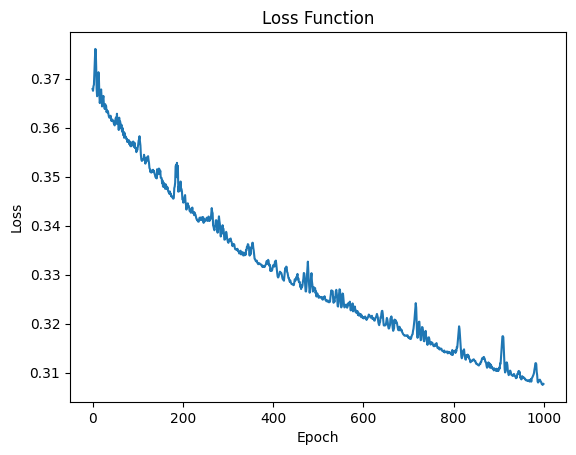

In [20]:
# # plot the loss function
final_loses_np = [fl.detach().numpy() for fl in final_loses]
plt.plot(range(epochs),final_loses_np)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Function")

In [21]:
## Prediction on test data
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_preds = model(data)
        predictions.append(y_preds.argmax().item())
        # print(y_preds.argmax().item())

In [22]:
cm = confusion_matrix(y_test, predictions)
cm

array([[78, 21],
       [24, 31]])

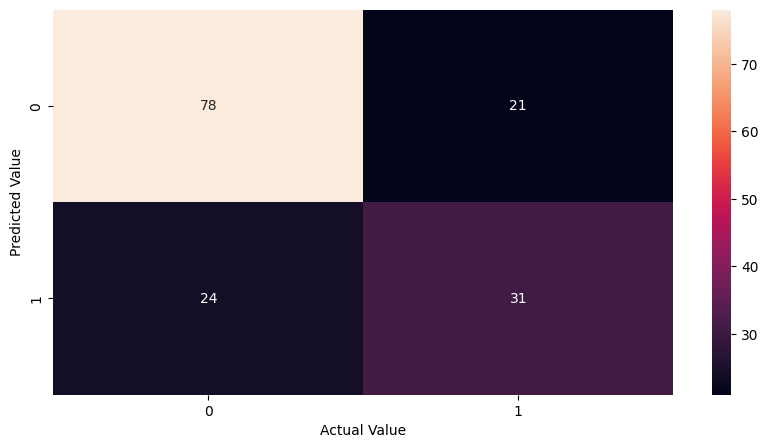

In [23]:
plt.figure(figsize=(10,5));
sns.heatmap(cm,annot=True);
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

In [39]:
#Accuracy Score
score = accuracy_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("Pima Diabetes")


# with mlflow.start_run():
    
#     # log the hyperparameters
#     mlflow.log_params(params)
    
#     # Log meetrics
#     mlflow.log_metric("accurcay", score)
#     mlflow.log_metric("mse", mse)
#     mlflow.log_metric("rmse",rmse)
    
#     # Set a tag that we can use to remind ourselves what this run was for
#     mlflow.set_tag("Training Info", "Deep learning model for Pima diabetes.")
    
    
#     remote_server_uri = "https://dagshub.com/jothammasila/healthcare.mlflow"
#     mlflow.set_tracking_uri(remote_server_uri)

#     tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    
# Log a model as a state_dict
with mlflow.start_run():
    state_dict = model.state_dict()
    mlflow.pytorch.log_state_dict(state_dict, artifact_path="model")

# Log a checkpoint as a state_dict
with mlflow.start_run():
    state_dict = {
        "model": model.state_dict(),
        "optimizer": optimizer.state_dict(),
        "epoch": epochs,
        "loss": loss,
    }
    mlflow.pytorch.log_state_dict(state_dict, artifact_path="checkpoint")


# 

In [21]:
# Accuracy Score
score = accuracy_score(y_test, predictions)
score

0.7467532467532467

In [45]:
# # Save model
# torch.save(model,'/home/jothammasila/Projects/Models/diabetes.pt')

In [23]:
# ## Load model

# t_model = torch.load('/home/jothammasila/Projects/Models/diabetes.pt')

In [24]:
#Check the model parameters

t_model.eval()

Diabetic_Model(
  (dense_layer1): Linear(in_features=8, out_features=20, bias=True)
  (dense_layer2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=2, bias=True)
)

In [25]:
## New data

class Data:
    def __init__(self, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
        self.Pregnancies = Pregnancies
        self.Glucose = Glucose
        self.BloodPressure = BloodPressure
        self.SkinThickness = SkinThickness
        self.Insulin = Insulin
        self.BMI = BMI
        self.DiabetesPedigreeFunction = DiabetesPedigreeFunction
        self.Age = Age
        
        self.data = pd.DataFrame({
            'Pregnancies': [self.Pregnancies],
            'Glucose': [self.Glucose],
            'BloodPressure': [self.BloodPressure],
            'SkinThickness': [self.SkinThickness],
            'Insulin': [self.Insulin],
            'BMI': [self.BMI],
            'DiabetesPedigreeFunction': [self.DiabetesPedigreeFunction],
            'Age': [self.Age]
        })
        
        self.data = torch.FloatTensor(self.data.values)
        

In [40]:
data = torch.tensor([4, 111, 67,32,7, 30.8,0.887,78])

In [46]:
# function for prediction.

def prediction(data):
    with torch.no_grad():
        model = torch.load('Models/diabetes.pt')
        outcome = [model(data),model(data).argmax().item()]
    return outcome

In [47]:
prediction(data)

[tensor([-2.6460, -4.8862]), 0]